In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


ID can't affect diagnosis
Unnamed:32 has NaN so can be ignored

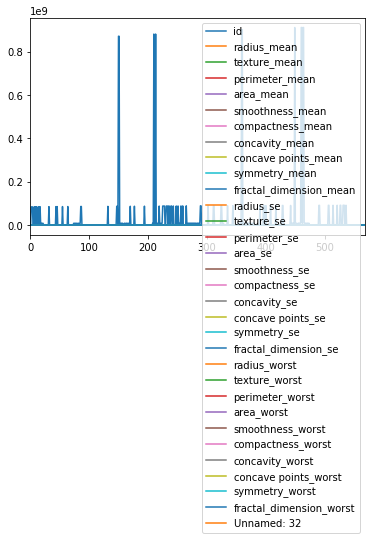

In [4]:
data.plot()

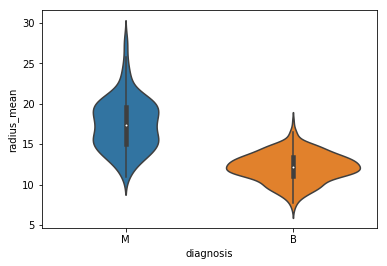

In [5]:
sns.violinplot(x="diagnosis", y="radius_mean", data=data, size=6)

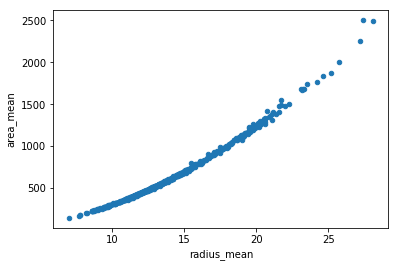

In [9]:
data.plot(kind="scatter",x="radius_mean",y="area_mean")

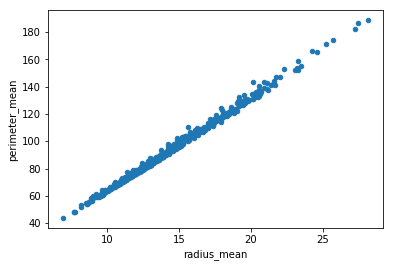

In [5]:
data.plot(kind="scatter",x="radius_mean",y="perimeter_mean")

perimeter, area and radius features are similar

In [13]:
col=data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


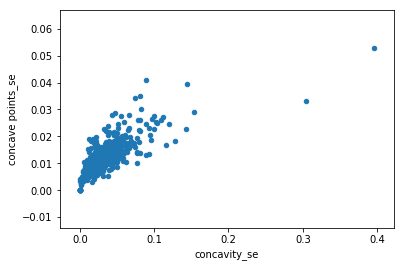

In [21]:
data.plot(kind="scatter",x="concavity_se",y="concave points_se")

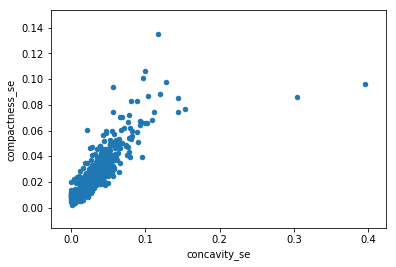

In [22]:
data.plot(kind="scatter",x="concavity_se",y="compactness_se")

concavity,compactness and concave point features are similar

In [6]:
x=data.drop(["id","diagnosis","Unnamed: 32"],axis=1)
y=data.diagnosis
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

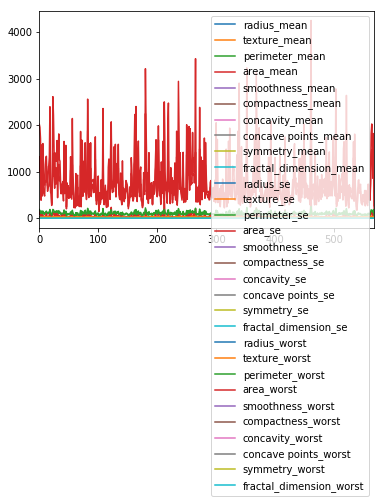

In [7]:
x.plot()

Feature ranking:
1. feature 27 (0.123613)
2. feature 20 (0.102393)
3. feature 23 (0.090718)
4. feature 22 (0.073362)
5. feature 7 (0.069074)
6. feature 0 (0.057682)
7. feature 2 (0.057616)
8. feature 6 (0.055987)
9. feature 3 (0.052329)
10. feature 26 (0.042248)
11. feature 25 (0.027331)
12. feature 21 (0.024081)
13. feature 1 (0.023992)
14. feature 13 (0.023794)
15. feature 12 (0.021898)
16. feature 24 (0.019354)
17. feature 10 (0.017798)
18. feature 5 (0.017481)
19. feature 28 (0.014939)
20. feature 4 (0.011544)
21. feature 29 (0.010375)
22. feature 17 (0.009089)
23. feature 16 (0.008688)
24. feature 15 (0.007596)
25. feature 8 (0.007226)
26. feature 9 (0.006757)
27. feature 18 (0.006067)
28. feature 19 (0.005820)
29. feature 14 (0.005708)
30. feature 11 (0.005441)


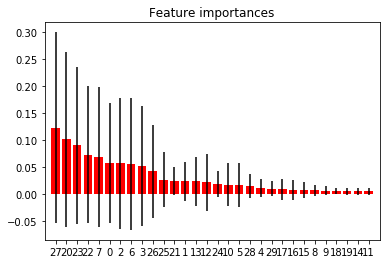

In [192]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

the top 10 features seem most significant

27 (0.123613)
20 (0.102393)
23 (0.090718)
22 (0.073362)
7 (0.069074)
0 (0.057682)
2 (0.057616)
6 (0.055987)
3 (0.052329)
26 (0.042248)

In [11]:
print(x.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [239]:
# 15 features i selected based of pearsons correlation
f=['radius_mean', 'texture_mean','smoothness_mean', 'compactness_mean','symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se','smoothness_se',
       'compactness_se','concave points_se', 'symmetry_se','concavity_worst','symmetry_worst', 'fractal_dimension_worst']
d=x[f]
d.head()


#top 10 features from plot above
features=["radius_mean","perimeter_mean","area_mean",'concavity_mean','concave points_mean',"radius_worst","perimeter_worst","area_worst",'concavity_worst', 'concave points_worst']
d1=x[features]
d1.head()

#top 5 features from plot above
features2=["radius_mean","perimeter_mean","area_mean",'concavity_mean','concave points_mean']
d2=x[features2]
d2.head()

#dropping repetitive features as I saw from plots above
droplist = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
d3=x.drop(droplist,axis=1)
d3.head()

#best no of features and those features
l=['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se','concavity_se', 'symmetry_se', 'smoothness_worst', 'concavity_worst','symmetry_worst', 'fractal_dimension_worst']
d4=x[l]
d4.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.1374,0.4000,0.2364,0.07678


In [196]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


the difference between the accuracy for 10 best features from above and for all features wasn't much
accuracy for 5 best features from above decreased as compared to when I took top 10 features for all algos except SVC (increased considerably)
when i dropped repitetive features:
only random forest showed improved accuracy
(choosing optimum features, as given by the function below, gave similar results)
SVC gives low accuracy. max accuracy given ~77%
MLPClassifier gave same low accuracy with all sets of data
the 15 features i selected( data d) had the same effect as most of the other sets on all algos but SVC: the accuracy of SVC increased greatly to ~91%

highest accuracy that i got : ~95% for random forest when i dropped repitetive features and with optimum features

In [222]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [240]:

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(d, y, test_size=0.3, random_state=0)

In [52]:
#knn with all features

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.947368421053
             precision    recall  f1-score   support

          B       0.96      0.95      0.96       108
          M       0.92      0.94      0.93        63

avg / total       0.95      0.95      0.95       171



In [241]:
#knn with 10 features

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.888888888889
             precision    recall  f1-score   support

          B       0.89      0.94      0.91       108
          M       0.89      0.79      0.84        63

avg / total       0.89      0.89      0.89       171



In [129]:
#decision tree with all features

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.918128654971
             precision    recall  f1-score   support

          B       0.97      0.90      0.93       108
          M       0.85      0.95      0.90        63

avg / total       0.92      0.92      0.92       171



In [242]:
#decision tree with 10 features

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions = dt.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.923976608187
             precision    recall  f1-score   support

          B       0.95      0.93      0.94       108
          M       0.88      0.92      0.90        63

avg / total       0.93      0.92      0.92       171



In [207]:
#Random forest for all features

rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.953216374269
             precision    recall  f1-score   support

          B       0.98      0.94      0.96       108
          M       0.91      0.97      0.94        63

avg / total       0.95      0.95      0.95       171



In [261]:
#Random forest for 10 features


rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predictions = rf.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.959064327485
             precision    recall  f1-score   support

          B       0.97      0.96      0.97       108
          M       0.94      0.95      0.94        63

avg / total       0.96      0.96      0.96       171



In [254]:
#svc for all features

svc=SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.631578947368
             precision    recall  f1-score   support

          B       0.63      1.00      0.77       108
          M       0.00      0.00      0.00        63

avg / total       0.40      0.63      0.49       171



C:\Users\arpithar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [271]:
#svc for 10 features


svc=SVC()
svc.fit(x_train, y_train)
predictions = svc.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.912280701754
             precision    recall  f1-score   support

          B       0.91      0.95      0.93       108
          M       0.91      0.84      0.88        63

avg / total       0.91      0.91      0.91       171



In [265]:
#all features logistic regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.964912280702
             precision    recall  f1-score   support

          B       0.99      0.95      0.97       108
          M       0.93      0.98      0.95        63

avg / total       0.97      0.96      0.97       171



In [269]:
#10 features logistic regression


lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.906432748538
             precision    recall  f1-score   support

          B       0.92      0.94      0.93       108
          M       0.89      0.86      0.87        63

avg / total       0.91      0.91      0.91       171



In [228]:
#neural network for all features

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, Y_train)
print("Training set score: %f" % mlp.score(X_train, Y_train))
print("Test set score: %f" % mlp.score(X_validation, Y_validation))

Iteration 1, loss = 10.93578361
Iteration 2, loss = 21.59266023
Iteration 3, loss = 36.59440536
Iteration 4, loss = 62.49972455
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.625628
Test set score: 0.631579


In [268]:
#neural network for d1,d2,d3,d4

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(x_train, y_train)
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_validation, y_validation))

Iteration 1, loss = 7.62452368
Iteration 2, loss = 0.72991148
Iteration 3, loss = 0.68447556
Iteration 4, loss = 0.65188269
Iteration 5, loss = 0.63837968
Iteration 6, loss = 0.64250859
Iteration 7, loss = 0.62677775
Iteration 8, loss = 0.59924918
Iteration 9, loss = 0.58988476
Iteration 10, loss = 0.59518649
Iteration 11, loss = 1.18480752
Iteration 12, loss = 0.65482097
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.625628
Test set score: 0.631579


In [238]:
#pearson correlation between all features

col=x.columns
for i in range(30):
    j=i+1
    while(j<30):
        l=[col[i],col[j]]
        p1 = data.loc[:,l].corr(method= "pearson")
        p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
        print('Pearson correlation: ')
        print(p1)
        print('Pearson correlation: ',p2)
        j+=1

Pearson correlation: 
              radius_mean  texture_mean
radius_mean      1.000000      0.323782
texture_mean     0.323782      1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                radius_mean  perimeter_mean
radius_mean        1.000000        0.997855
perimeter_mean     0.997855        1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
             radius_mean  area_mean
radius_mean     1.000000   0.987357
area_mean       0.987357   1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                 radius_mean  smoothness_mean
radius_mean         1.000000         0.170581
smoothness_mean     0.170581         1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                  radius_mean  compactness_mean
radius_mean          1.000000          0.506124
compactness_mean     0.506124          1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                radius_mean  concavity_me

Pearson correlation:  0.987357170057
Pearson correlation: 
                         texture_mean  fractal_dimension_worst
texture_mean                 1.000000                 0.119205
fractal_dimension_worst      0.119205                 1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                perimeter_mean  area_mean
perimeter_mean        1.000000   0.986507
area_mean             0.986507   1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                 perimeter_mean  smoothness_mean
perimeter_mean         1.000000         0.207278
smoothness_mean        0.207278         1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                  perimeter_mean  compactness_mean
perimeter_mean          1.000000          0.556936
compactness_mean        0.556936          1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                perimeter_mean  concavity_mean
perimeter_mean        1.000000        0.716

Pearson correlation:  0.987357170057
Pearson correlation: 
                  smoothness_mean  smoothness_worst
smoothness_mean          1.000000          0.805324
smoothness_worst         0.805324          1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                   smoothness_mean  compactness_worst
smoothness_mean           1.000000           0.472468
compactness_worst         0.472468           1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                 smoothness_mean  concavity_worst
smoothness_mean         1.000000         0.434926
concavity_worst         0.434926         1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                      smoothness_mean  concave points_worst
smoothness_mean              1.000000              0.503053
concave points_worst         0.503053              1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                 smoothness_mean  symmetry_worst
smoothne

Pearson correlation:  0.987357170057
Pearson correlation: 
               texture_se  texture_worst
texture_se       1.000000       0.409003
texture_worst    0.409003       1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                 texture_se  perimeter_worst
texture_se         1.000000        -0.102242
perimeter_worst   -0.102242         1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
            texture_se  area_worst
texture_se    1.000000   -0.083195
area_worst   -0.083195    1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                  texture_se  smoothness_worst
texture_se          1.000000         -0.073658
smoothness_worst   -0.073658          1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                   texture_se  compactness_worst
texture_se           1.000000          -0.092439
compactness_worst   -0.092439           1.000000
Pearson correlation:  0.987357170057
Pearson correlati

Pearson correlation:  0.987357170057
Pearson correlation: 
                   concave points_se  radius_worst
concave points_se           1.000000      0.358127
radius_worst                0.358127      1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                   concave points_se  texture_worst
concave points_se           1.000000       0.086741
texture_worst               0.086741       1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                   concave points_se  perimeter_worst
concave points_se           1.000000         0.394999
perimeter_worst             0.394999         1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                   concave points_se  area_worst
concave points_se           1.000000    0.342271
area_worst                  0.342271    1.000000
Pearson correlation:  0.987357170057
Pearson correlation: 
                   concave points_se  smoothness_worst
concave points_se           1.00

In [78]:
data2=x
data2=(data2-data2.mean())/data2.std()
data2.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [ ]:
data2.describe()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

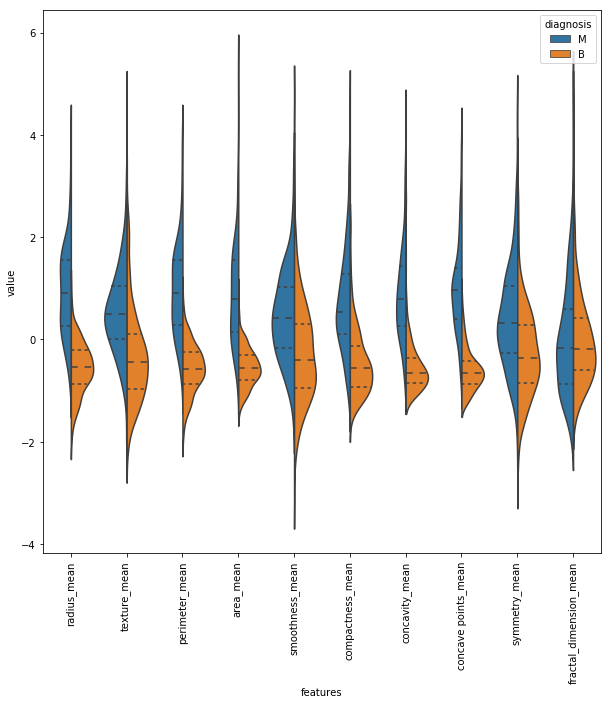

In [24]:

data_dia = y
data = x
data2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

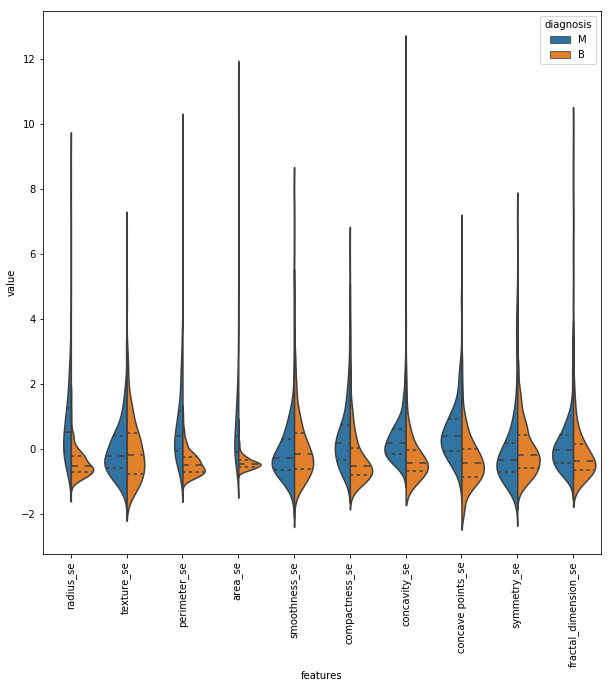

In [25]:

data_dia = y
data = x
data2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

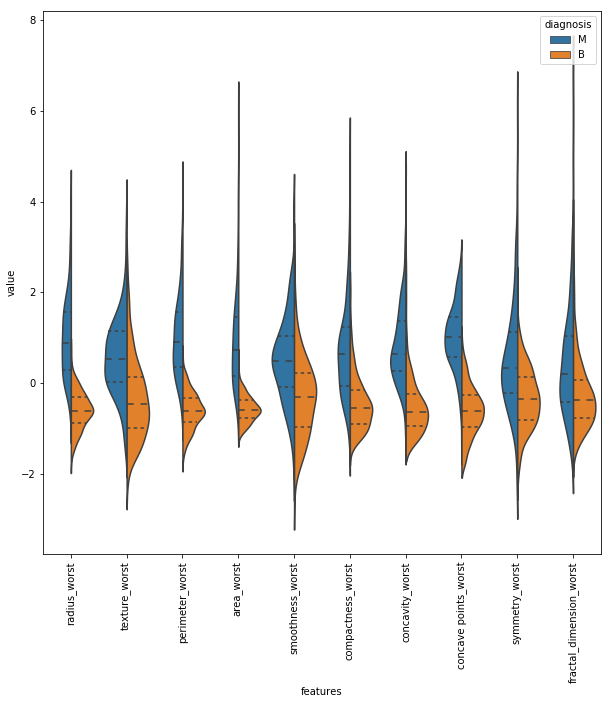

In [26]:

data_dia = y
data = x
data2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)